# e/iso/sQTL and gene comparison
1. e/iso/sGene overlap; gene type comparison; pLI
2. top e/iso/sQTL distance to TSS
3. QTL schematic
4. LD schematic
5. genes with xQTL

In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(data.table))
suppressMessages(library(VennDiagram))
suppressMessages(library(UpSetR))
suppressMessages(library(ggsci))

# suppressMessages(library(ggridges))

In [2]:
setwd("~/project-gandalm/isoform_twas/")

### 1: e/iso/sGene (grouped permutation)
- egene `call_perm.R` removes duplicate pid, only kept the one with lowest npval
- isogene and sgene used GTEx script, didn't do that so duplicate pid

In [3]:
egene <- fread("eqtl_new/results/mixed_perm_90hcp/sig_pheno.txt", data.table = F)
isogene <- fread("isoqtl_new/results/mixed_grp_perm_70hcp/group.perm.genes.txt.gz", data.table = F)
sgene <- fread("sqtl_new/results/mixed_grp_perm_40hcp_1e6/group.perm.genes.txt.gz", data.table = F)

In [4]:
isogene <- isogene %>% filter(qval < 0.05)
sgene <- sgene %>% filter(qval < 0.05)

In [5]:
sgene <- sgene %>% separate(group_id, c("ensg_id", "version"), sep = "[.]", remove = FALSE)
length(unique(sgene$ensg_id))

[1] 7490

In [6]:
dim(isogene)
length(unique(isogene$gene_id))
length(unique(isogene$group_id))

dim(sgene)
length(unique(sgene$gene_id))
length(unique(sgene$ensg_id))

[1] 11861    21

[1] 11859

[1] 11845

[1] 8191   23

[1] 7658

[1] 7490

[1] 10094

[1] 11845

[1] 7490

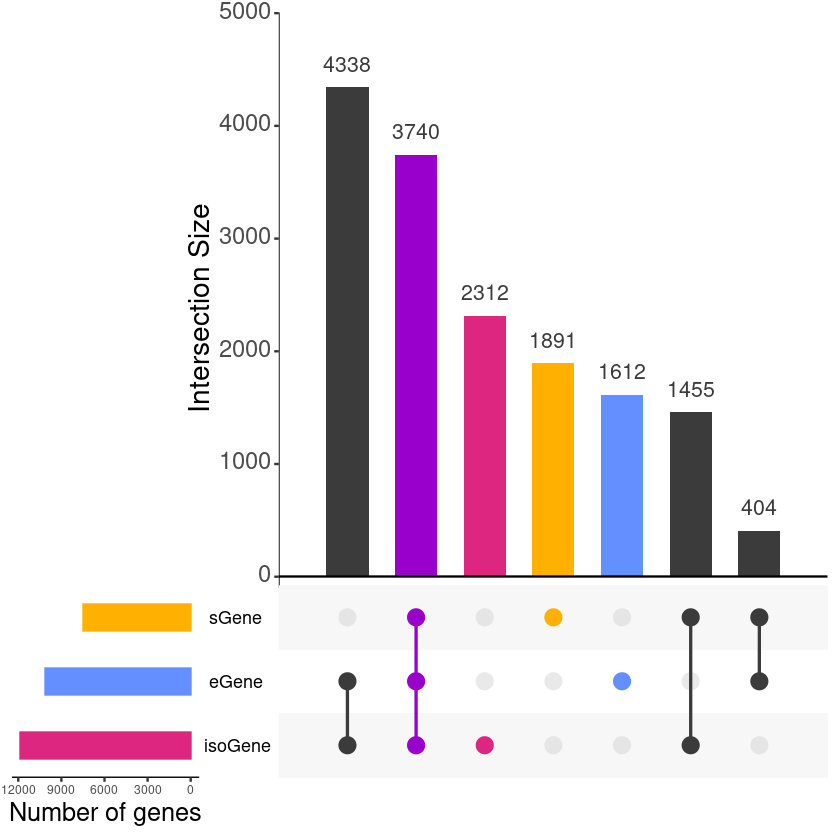

In [7]:
egenes <- unique(egene$pid)
length(egenes)
isogenes <- unique(isogene$group_id)
length(isogenes)
sgenes <- unique(sgene$ensg_id)
length(sgenes)

compare <- list(eGene = egenes, isoGene = isogenes, sGene = sgenes)

upset(fromList(compare), order.by = "freq",
      sets.bar.color = c("#DC267F", "#648FFF", "#FFB000"),
      empty.intersections = "on",
      sets.x.label = "Number of genes",
      point.size = 4.5,
      queries = list(list(query = intersects, params = list("eGene","isoGene","sGene"),
                          color = "#9900CC", active = T),
                     list(query = intersects, params = list("eGene"),
                          color = "#648FFF", active = T),
                     list(query = intersects, params = list("isoGene"),
                          color = "#DC267F", active = T),
                     list(query = intersects, params = list("sGene"),
                          color = "#FFB000", active = T)),
      text.scale = c(2, 2, 1.8, 1, 1.5, 2))

In [8]:
pdf(file = "sqtl_new/figures/e_iso_sgene.pdf", onefile = F, width = 6, height = 6)
upset(fromList(compare), order.by = "freq",
      sets.bar.color = c("#DC267F", "#648FFF", "#FFB000"),
      empty.intersections = "on",
      sets.x.label = "Number of genes",
      point.size = 4.5,
      queries = list(list(query = intersects, params = list("eGene","isoGene","sGene"),
                          color = "#9900CC", active = T),
                     list(query = intersects, params = list("eGene"),
                          color = "#648FFF", active = T),
                     list(query = intersects, params = list("isoGene"),
                          color = "#DC267F", active = T),
                     list(query = intersects, params = list("sGene"),
                          color = "#FFB000", active = T)),
      text.scale = c(2, 2, 1.8, 1, 1.5, 2))
dev.off()

png 
  2

In [10]:
annot <- fread("salmon/gencode.v33lift37.annotation.gene.info.tsv", data.table = F)

In [12]:
egene <- egene %>% left_join(annot, by = c("pid" = "ensg"))
isogene <- isogene %>% left_join(annot, by = c("group_id" = "ensg"))
sgene <- sgene %>% left_join(annot, by = c("ensg_id" = "ensg"))

In [21]:
dim(isogene)
length(unique(isogene$group_id))
dim(sgene)
length(unique(sgene$ensg_id))

[1] 11861    33

[1] 11845

[1] 8191   35

[1] 7490

In [20]:
df_e <- as.data.frame(sort(table(egene$V11)))
df_e <- df_e[order(df_e$Freq, decreasing = TRUE),]
df_e <- df_e[c(1:4),]
df_e
df_e$Var1 <- as.character(df_e$Var1)

df_e[5,] <- c("Other", (10094-sum(df_e[,2])))
df_e

,Var1,Freq
,<fct>,<int>
25,protein_coding,6278
24,lncRNA,2448
23,processed_pseudogene,378
22,transcribed_unprocessed_pseudogene,244


,Var1,Freq
,<chr>,<chr>
25,protein_coding,6278
24,lncRNA,2448
23,processed_pseudogene,378
22,transcribed_unprocessed_pseudogene,244
5,Other,746


In [23]:
sgene1 <- sgene[!duplicated(sgene$ensg_id),]
dim(sgene1)
df_s <- as.data.frame(sort(table(sgene1$V11)))
df_s <- df_s[order(df_s$Freq, decreasing = TRUE),]
df_s <- df_s[c(1:4),]
df_s
df_s$Var1 <- as.character(df_s$Var1)

df_s[5,] <- c("Other", (7490-sum(df_s[,2])))
df_s

[1] 7490   35

,Var1,Freq
,<fct>,<int>
18,protein_coding,6093
17,lncRNA,1008
16,transcribed_unprocessed_pseudogene,231
15,unprocessed_pseudogene,70


,Var1,Freq
,<chr>,<chr>
18,protein_coding,6093
17,lncRNA,1008
16,transcribed_unprocessed_pseudogene,231
15,unprocessed_pseudogene,70
5,Other,88


In [24]:
isogene1 <- isogene[!duplicated(isogene$group_id),]
dim(isogene1)
df_iso <- as.data.frame(sort(table(isogene1$V11)))
df_iso <- df_iso[order(df_iso$Freq, decreasing = TRUE),]
df_iso <- df_iso[c(1:4),]
df_iso
df_iso$Var1 <- as.character(df_iso$Var1)

df_iso[5,] <- c("Other", (11845-sum(df_iso[,2])))
df_iso

[1] 11845    33

,Var1,Freq
,<fct>,<int>
26,protein_coding,7701
25,lncRNA,2607
24,processed_pseudogene,435
23,transcribed_unprocessed_pseudogene,253


,Var1,Freq
,<chr>,<chr>
26,protein_coding,7701
25,lncRNA,2607
24,processed_pseudogene,435
23,transcribed_unprocessed_pseudogene,253
5,Other,849


In [25]:
df_all <- rbind(df_e, df_iso, df_s)
df_all$group <- c(rep("eGene", 5), rep("isoGene", 5), rep("sGene", 5))
df_all$Var1 <- factor(df_all$Var1, levels = c("protein_coding", "lncRNA", "processed_pseudogene", "transcribed_unprocessed_pseudogene",
                                             "unprocessed_pseudogene", "Other"))
df_all$group <- factor(df_all$group, levels = c("eGene", "isoGene", "sGene"))

In [26]:
df_all

,Var1,Freq,group
,<fct>,<chr>,<fct>
25,protein_coding,6278,eGene
24,lncRNA,2448,eGene
23,processed_pseudogene,378,eGene
22,transcribed_unprocessed_pseudogene,244,eGene
5,Other,746,eGene
26,protein_coding,7701,isoGene
251,lncRNA,2607,isoGene
241,processed_pseudogene,435,isoGene
231,transcribed_unprocessed_pseudogene,253,isoGene


In [27]:
df_all$Freq <- as.numeric(df_all$Freq)

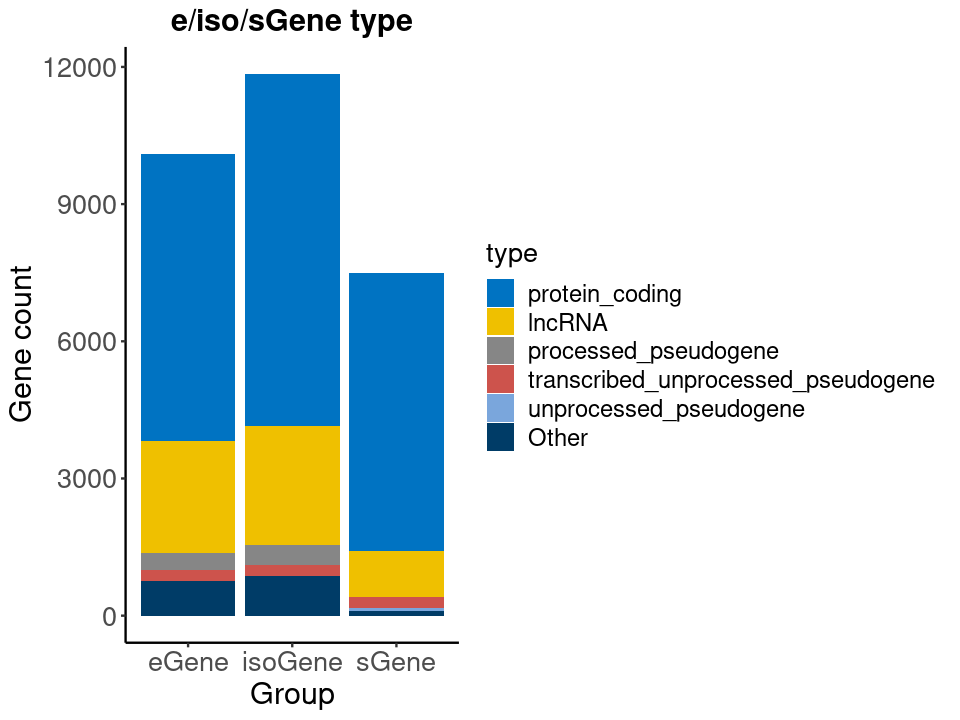

In [29]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(df_all, aes(x = group, y = Freq, fill = Var1)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "e/iso/sGene type", x = "Group", y = "Gene count", fill = "type") +
  theme_classic() +
  theme(axis.text = element_text(size = 16), 
        axis.title = element_text(size = 18), 
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        legend.text = element_text(size = 14),
        legend.title = element_text(size = 16)) +
    scale_fill_jco()

In [30]:
ggsave("sqtl_new/figures/e_iso_sgene_type.pdf", height = 6, width = 8)

### 2: Top e/iso/sQTL distance to target gene (grouped permutation)
- sig only

**05/17/2023 revision update: remove duplicate variant**

In [6]:
egene <- egene %>% mutate(dist_kb = dist/1000)
isogene <- isogene %>% mutate(dist_kb = tss_distance/1000)
sgene <- sgene %>% mutate(dist_kb = tss_distance/1000)

In [7]:
egene_qtl <- egene %>% 
    select(sid, dist_kb, qval) %>% 
    arrange(sid, qval) %>% 
    group_by(sid) %>% 
    dplyr::slice(1) %>% 
    ungroup() %>% 
    as.data.frame()

In [8]:
isogene_qtl <- isogene %>% select(variant_id, dist_kb, qval) %>% 
    arrange(variant_id, qval) %>% 
    group_by(variant_id) %>% 
    dplyr::slice(1) %>% 
    ungroup() %>% 
    as.data.frame()
sgene_qtl <- sgene %>% select(variant_id, dist_kb, qval) %>% 
    arrange(variant_id, qval) %>% 
    group_by(variant_id) %>% 
    dplyr::slice(1) %>% 
    ungroup() %>% 
    as.data.frame()

In [27]:
colnames(isogene_qtl)[1] <- colnames(sgene_qtl)[1] <- "sid"
qtl <- rbind(egene_qtl, isogene_qtl, sgene_qtl)
qtl$group <- c(rep("eQTL", nrow(egene_qtl)), 
               rep("isoQTL", nrow(isogene_qtl)),
               rep("sQTL", nrow(sgene_qtl)))
# qtl[qtl$qval>=0.05, 'group'] <- "non-significant"
qtl$group <- factor(qtl$group, levels = c("eQTL", "isoQTL", "sQTL"))

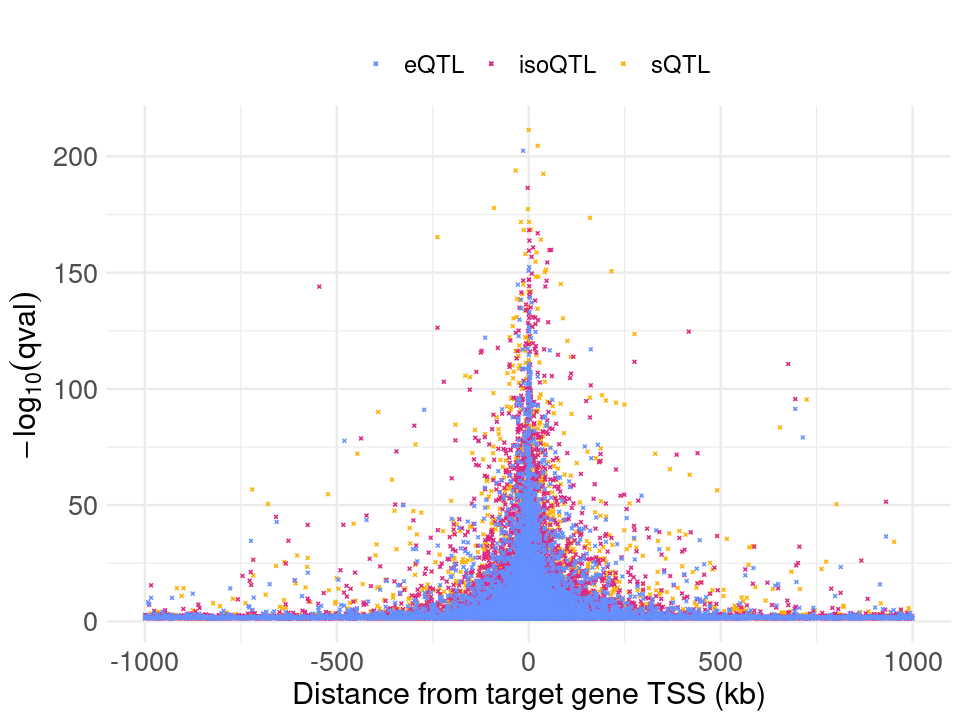

In [28]:
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot() +
    geom_point(data = qtl[qtl$group == "sQTL",],
               aes(x = dist_kb, y = -log10(qval), color = group), size = 0.5, shape = 4) +
    geom_point(data = qtl[qtl$group == "isoQTL",],
               aes(x = dist_kb, y = -log10(qval), color = group), size = 0.5, shape = 4) +
    geom_point(data = qtl[qtl$group == "eQTL",],
               aes(x = dist_kb, y = -log10(qval), color = group), size = 0.5, shape = 4) +
#     geom_point(aes(y = -log10(qval), color = group), size = 0.5, shape = 4) +
    labs(x = "Distance from target gene TSS (kb)",
         y = expression(-log[10](qval)),
         title = "",
         color = "") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.text = element_text(size = 14),
          legend.title = element_text(size = 16),
          legend.position = "top") +
    scale_color_manual(values = c("eQTL" = "#648FFF", "isoQTL" = "#DC267F", "sQTL" = "#FFB000")) 
#     geom_hline(yintercept = -log10(0.05), linetype = "dashed")

In [29]:
ggsave("sqtl_new/figures/e_iso_s_dist.pdf", width = 8, height = 6)

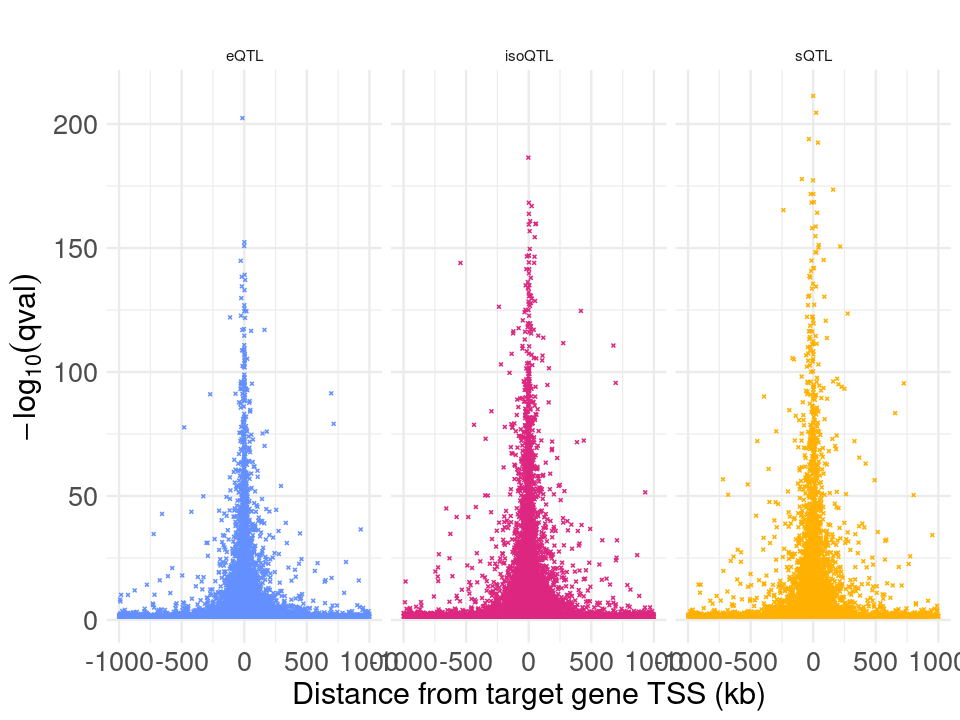

In [30]:
ggplot(qtl, aes(x = dist_kb)) +
#     geom_point(data = qtl[qtl$group == "cis-sQTL",],
#                aes(y = -log10(qval), color = group), alpha = 0.2, size = 3, shape = 20) +
#     geom_point(data = qtl[qtl$group == "cis-isoQTL",],
#                aes(y = -log10(qval), color = group), alpha = 0.2, size = 3, shape = 20) +
#     geom_point(data = qtl[qtl$group == "cis-eQTL",],
#                aes(y = -log10(qval), color = group), alpha = 0.2, size = 3, shape = 20) +
    geom_point(aes(y = -log10(qval), color = group), size = 0.5, shape = 4) +
    facet_wrap(.~group) +
    labs(x = "Distance from target gene TSS (kb)",
         y = expression(-log[10](qval)),
         title = "",
         color = "") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.text = element_text(size = 14),
          legend.title = element_text(size = 16),
          legend.position = "none") +
    scale_color_manual(values = c("eQTL" = "#648FFF", "isoQTL" = "#DC267F", "sQTL" = "#FFB000")) 
#     geom_hline(yintercept = -log10(0.05), linetype = "dashed")

**below is old plot, where duplicate variant were not removed**

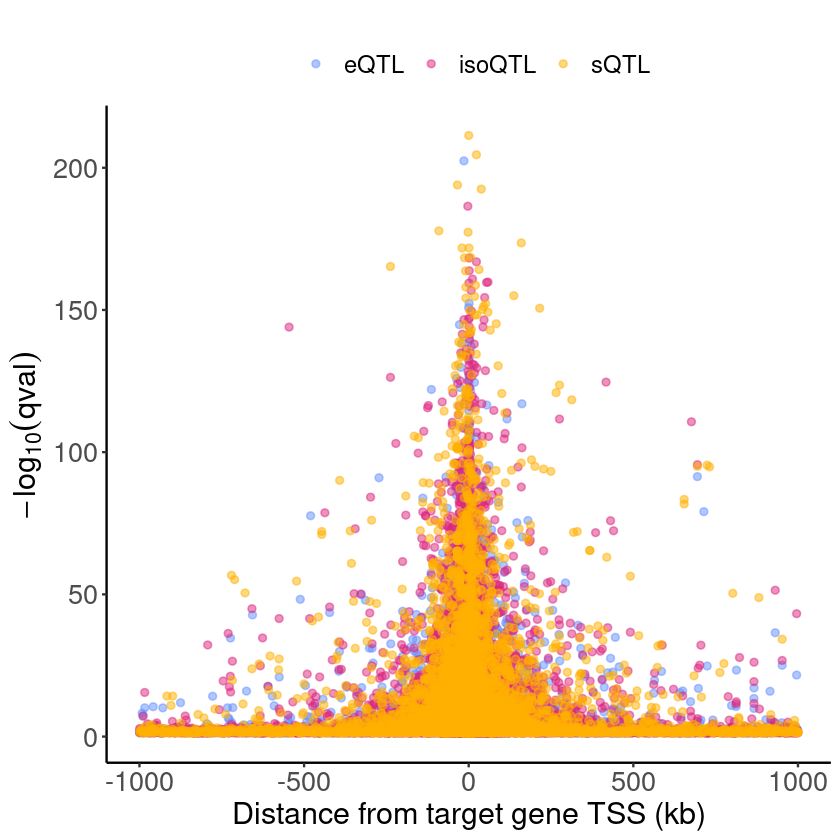

In [15]:
ggplot(qtl, aes(x = dist_kb)) +
#     geom_point(data = qtl[qtl$group == "cis-sQTL",],
#                aes(y = -log10(qval), color = group), alpha = 0.2, size = 3, shape = 20) +
#     geom_point(data = qtl[qtl$group == "cis-isoQTL",],
#                aes(y = -log10(qval), color = group), alpha = 0.2, size = 3, shape = 20) +
#     geom_point(data = qtl[qtl$group == "cis-eQTL",],
#                aes(y = -log10(qval), color = group), alpha = 0.2, size = 3, shape = 20) +
    geom_point(aes(y = -log10(qval), color = group), alpha = 0.5, size = 2.5, shape = 20) +
    labs(x = "Distance from target gene TSS (kb)",
         y = expression(-log[10](qval)),
         title = "",
         color = "") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        legend.text = element_text(size = 14),
        legend.title = element_text(size = 16),
         legend.position = "top") +
    scale_color_manual(values=c("#648FFF", "#DC267F", "#FFB000")) 
#     geom_hline(yintercept = -log10(0.05), linetype = "dashed")

In [16]:
ggsave("sqtl_new/figures/e_iso_s_dist.pdf", width = 6, height = 6)

### 3: QTL schematic

In [3]:
aa <- rnorm(50, mean = 10, sd = 1)
at <- rnorm(50, mean = 14, sd = 1.5)
tt <- rnorm(50, mean = 18, sd = 1)
df <- data.frame("value" = c(aa, at, tt), "Genotype" = c(rep("A/A", 50), rep("A/T", 50), rep("T/T", 50)))

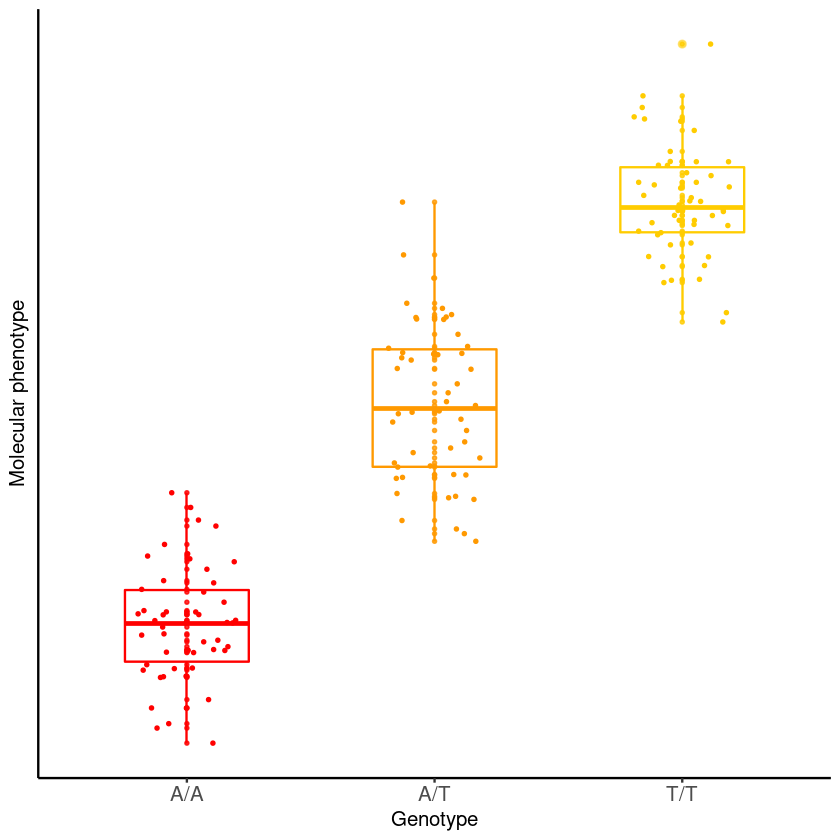

In [4]:
ggplot(df, aes(x = Genotype, y = value, color = Genotype)) +
#     geom_violin(alpha = .4, trim = FALSE) +
    geom_boxplot(width = 0.5, fill = 'white', alpha = 0.5) +
    geom_point(alpha = 0.8, size = 0.5) +
    geom_jitter(width = 0.2, size = 0.5) +
    labs(x = "Genotype", y = "Molecular phenotype") + 
    theme_classic() +
    theme(axis.text = element_text(size = 12),
          axis.title = element_text(size = 12),
          legend.position = "none",
          axis.text.y = element_blank(),
          axis.ticks.y = element_blank()) +
    scale_color_ucscgb()

In [5]:
ggsave("eqtl_new/figures/qtl_schematic.pdf", width = 2, height = 2)

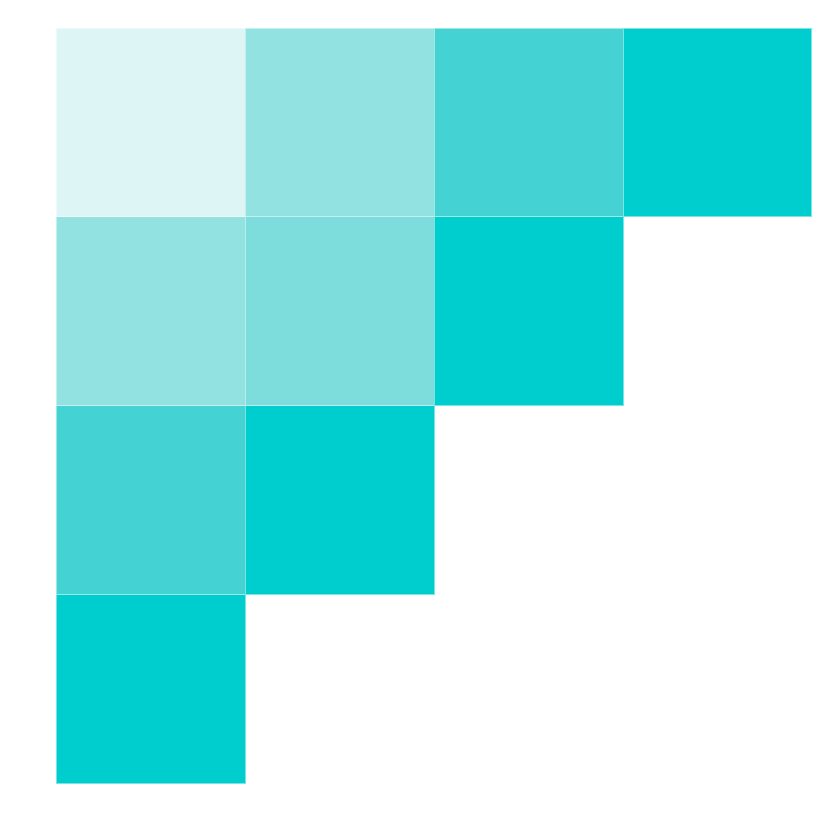

In [93]:
pop1 <- data.frame("var1" = c("a", "a", "a", "a", "b", "b", "b", "c", "c", "d"),
                   "var2" = c("a", "b", "c", "d", "b", "c", "d", "c", "d", "d"),
                   "r" = c(1, .9, .6, .2, 1, .7, .6, 1, .9, 1))
p <- ggplot(pop1, aes(x = var1, y = var2, fill = r)) +
    geom_tile(color = "white") +
    scale_fill_gradient2(low = "white", high = "cyan3") +
    theme_classic() +
    labs(x = "", y = "") +
    theme(legend.position = "none",
          axis.text = element_blank(),
          axis.ticks = element_blank(),
          axis.line=element_blank(),)
p

In [94]:
ggsave("eqtl_new/figures/ld_schematic1.pdf", p, width = 2, height = 2)

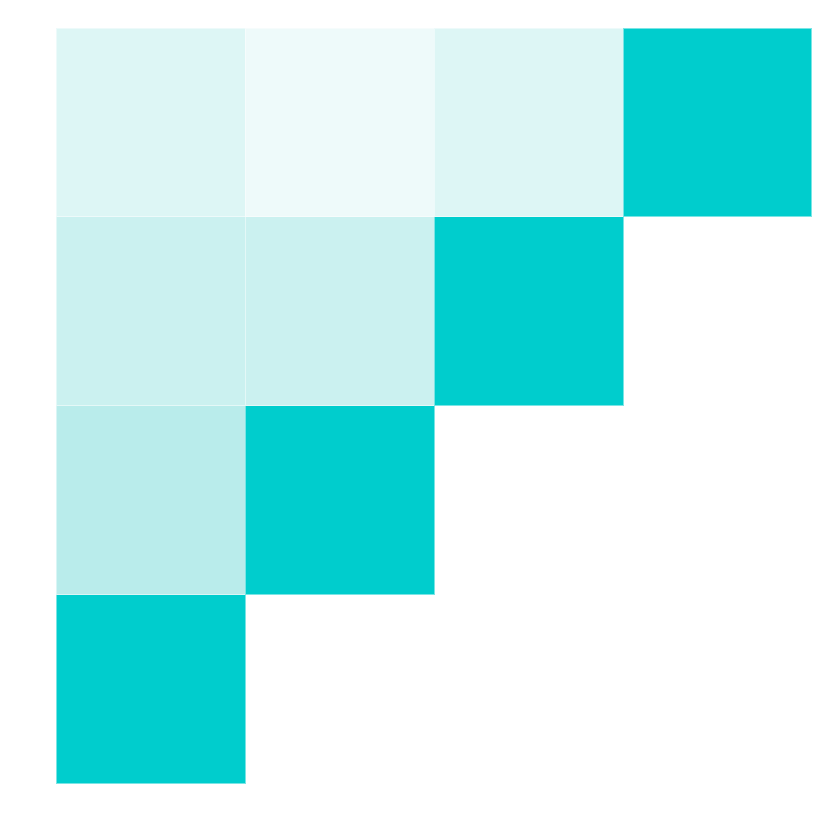

In [95]:
pop1 <- data.frame("var1" = c("a", "a", "a", "a", "b", "b", "b", "c", "c", "d"),
                   "var2" = c("a", "b", "c", "d", "b", "c", "d", "c", "d", "d"),
                   "r" = c(1, .4, .3, .2, 1, .3, .1, 1, .2, 1))
p <- ggplot(pop1, aes(x = var1, y = var2, fill = r)) +
    geom_tile(color = "white") +
    scale_fill_gradient2(low = "white", high = "cyan3") +
    theme_classic() +
    labs(x = "", y = "") +
    theme(legend.position = "none",
          axis.text = element_blank(),
          axis.ticks = element_blank(),
          axis.line=element_blank())
p

In [96]:
ggsave("eqtl_new/figures/ld_schematic2.pdf", p, width = 2, height = 2)

In [ ]:
aa <- rnorm(50, mean = 10, sd = 1)
at <- rnorm(50, mean = 14, sd = 1.5)
tt <- rnorm(50, mean = 18, sd = 1)
df <- data.frame("value" = c(aa, at, tt), "Genotype" = c(rep("AA", 50), rep("AT", 50), rep("TT", 50)))

In [3]:
df <- data.frame("Genotype" = c(rep("AA", 20), rep("AT", 20), rep("TT", 20)), 
                 "sex" = rep(c(rep("Male", 10), rep("Female", 10)), 3))

In [27]:
aa_m <- rnorm(10, mean = 0, sd = 1)
aa_f <- rnorm(10, mean = 0, sd = 1)
at_m <- rnorm(10, mean = 0, sd = 1)
at_f <- rnorm(10, mean = 1.6, sd = 0.9)
tt_m <- rnorm(10, mean = 0, sd = 1)
tt_f <- rnorm(10, mean = 2.4, sd = 0.8)

In [28]:
df$expr <- c(aa_m, aa_f, at_m, at_f, tt_m, tt_f)

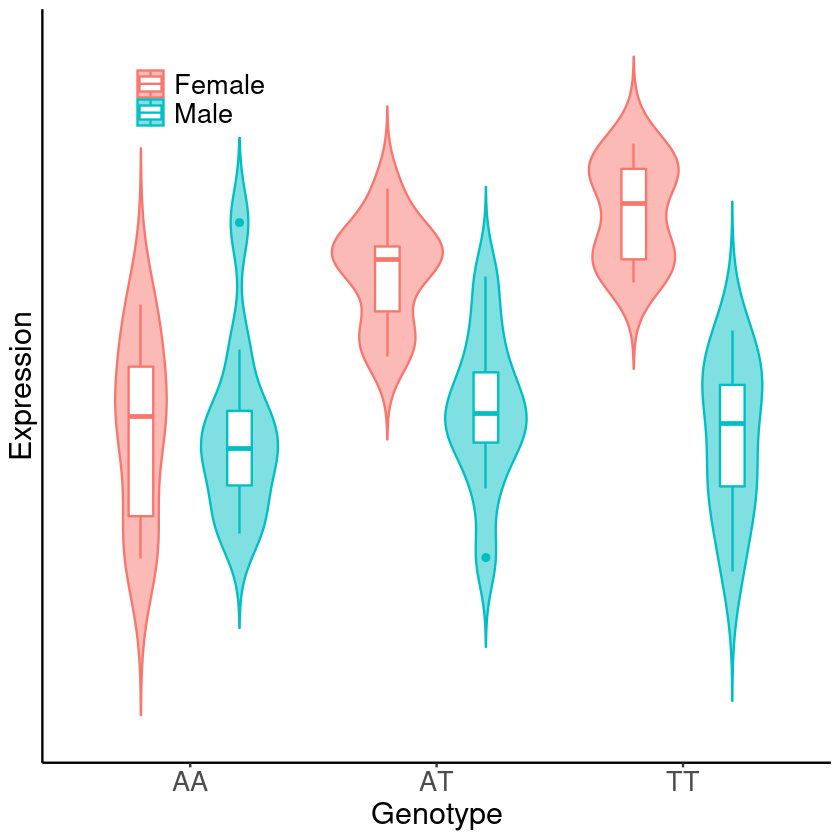

In [40]:
dodge <- position_dodge(width = 0.8)
ggplot(df, aes(x = Genotype, y = expr, fill = sex, color = sex)) +
    geom_violin(position = dodge, alpha = 0.5, trim = FALSE) +
    geom_boxplot(fill = 'white', width = 0.2, position = dodge) +
labs(x = "Genotype", y = "Expression", color = "", fill = "") + 
  theme_classic() +
  theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        legend.position = c(0.2, 0.9),
        legend.text = element_text(size = 16)) +
scale_y_discrete(labels = NULL, breaks = seq(-2.5,5,2.5))

In [41]:
ggsave("eqtl_new/figures/sex_biased_shematic.pdf", width = 4, height = 4)

### 5. e/iso/sQTL genes combined+CT specific genes
- e/iso/sQTL combined: 15752 genes
- adding cell type eGenes: 17874

In [9]:
eqtl <- fread("eqtl_new/results/mixed_perm_90hcp/sig_pheno.txt", data.table = F)
egenes <- unique(eqtl$pid)

In [5]:
isoqtl <- fread("isoqtl_new/results/mixed_grp_perm_70hcp/group.perm.genes.txt.gz", data.table = F)
head(isoqtl)

,gene_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,tss_distance,ma_samples,ma_count,...,ref_factor,pval_nominal,slope,slope_se,pval_perm,pval_beta,group_id,group_size,qval,pval_nominal_threshold
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,...,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,ENST00000456328.2_1:ENSG00000223972,846,1.03391,153.810,472.615,0.000277306,chr1:935662,859173,14,14,...,1,9.17017e-05,0.0480143,0.01218360,0.0332967,0.0369681,ENSG00000223972,1,0.0379578,0.000388848
2,ENST00000473358.1_1:ENSG00000243485,882,1.01921,160.210,472.148,0.002260950,rs58879223,862458,48,50,...,1,1.01256e-03,-0.0232775,0.00704346,0.2932900,0.2953390,ENSG00000243485,1,0.1766770,0.000355642
3,ENST00000488147.1_2:ENSG00000227232,882,1.03391,164.177,481.710,0.006480150,rs74047413,845095,22,23,...,1,3.71668e-03,0.0284500,0.00976390,0.6533940,0.6419820,ENSG00000227232,1,0.2838210,0.000364301
4,ENST00000461467.1_2:ENSG00000237613,900,1.08949,141.258,445.279,0.012502100,rs74048004,981625,18,19,...,1,5.63050e-03,-0.0281826,0.01013920,0.8131600,0.8070160,ENSG00000237613,1,0.3252290,0.000503392
5,ENST00000495576.1_2:ENSG00000239945,1125,1.06696,164.354,451.342,0.014158000,rs534809610,877903,14,14,...,1,6.91359e-03,0.0336841,0.01242380,0.8913620,0.8925120,ENSG00000239945,1,0.3455850,0.000404123
6,ENST00000442987.3_1:ENSG00000233750,1334,1.02439,206.710,464.549,0.002985880,rs140316058,971632,17,17,...,1,1.27217e-03,-0.0365124,0.01127260,0.4619290,0.4492090,ENSG00000233750,1,0.2291940,0.000280446


In [6]:
isoqtl.sig <- isoqtl %>% filter(qval < 0.05)
isogene <- unique(isoqtl.sig$group_id)

In [7]:
length(isogene)

[1] 11845

In [9]:
test <- fread("isoqtl_new/results/mixed_perm_70hcp/sig_pheno_gene.txt", data.table = F)
head(test)

,pid,nvar,shape1,shape2,dummy,sid,dist,npval,slope,ppval,bpval,qval,pval_nominal_threshold,Gene
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ENST00000002165.11_3,5683,1.04270,863.673,478.732,rs4896658,-47658,1.04606e-17,-0.814467,0.00009999,2.84572e-13,3.88533e-12,2.30536e-05,ENSG00000001036
2,ENST00000002501.11_2,4247,1.08405,461.862,450.821,rs78536691,14607,8.12818e-07,-0.476499,0.00159984,2.08651e-03,8.58905e-03,5.10417e-05,ENSG00000003249
3,ENST00000002596.6_3,7427,1.04532,878.552,477.103,rs57203756,256802,2.62013e-06,-0.696909,0.00759924,7.96587e-03,2.76269e-02,2.29153e-05,ENSG00000002587
4,ENST00000003100.13_4,4221,1.01913,520.765,479.814,rs34040612,35125,3.26734e-15,-0.201914,0.00009999,5.24469e-11,5.89738e-10,3.45304e-05,ENSG00000001630
5,ENST00000003302.8_2,5184,1.04422,804.917,483.553,rs7126080,-21619,2.00629e-09,0.231246,0.00009999,8.26057e-06,5.23915e-05,2.48958e-05,ENSG00000048028
6,ENST00000003583.12_2,5651,1.05037,809.344,475.954,rs11578878,-9278,3.09987e-34,0.523475,0.00009999,1.96434e-28,7.14212e-27,2.54073e-05,ENSG00000001460


In [11]:
test.gene <- unique(test$Gene)
length(test.gene)
sum(test.gene%in%isogene)

[1] 11468

[1] 10799

In [34]:
sqtl <- fread("sqtl_new/results/mixed_grp_perm_40hcp_1e6/group.perm.genes.txt.gz", data.table = F)
head(sqtl)

,gene_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,tss_distance,ma_samples,ma_count,...,ref_factor,pval_nominal,slope,slope_se,pval_perm,pval_beta,group_id,group_size,qval,pval_nominal_threshold
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,...,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,1:16310:16607:clu_7638_NA:ENSG00000227232.5_3:WASH7P,882,1.022960,3712.170,526.951,5.90366e-05,rs115208257,756453,22,22,...,1,2.10030e-05,0.0405323,0.00945126,0.18530200,0.187963000,ENSG00000227232.5_3,26,0.11609600,1.87719e-05
2,1:164791:165884:clu_7642_NA:ENSG00000238009.6_9:AL627309.1,1348,0.988039,1191.960,528.668,2.00498e-03,chr1:911163,712820,95,105,...,1,1.08803e-03,-0.0147878,0.00450449,0.91582800,0.910494000,ENSG00000238009.6_9,5,0.33305400,5.21862e-05
3,1:165942:167959:clu_7644_NA:ENSG00000241860.7_7:AL627309.5,1577,1.053680,2169.920,517.861,1.83813e-03,rs12565032,606367,42,43,...,1,8.74303e-04,0.0222408,0.00664854,0.97658500,0.979312000,ENSG00000241860.7_7,8,0.34993900,3.52965e-05
4,1:700627:701709:clu_7646_NA:ENSG00000228463.4:AP006222.2,1902,1.038170,579.717,517.630,2.01602e-03,rs115979567,612323,15,15,...,1,9.68055e-04,0.0374274,0.01128580,0.68327600,0.674551000,ENSG00000228463.4,2,0.27608500,1.26028e-04
5,1:744003:744111:clu_7663_NA:ENSG00000228327.3_7:AL669831.1,3081,1.013770,36858.300,550.210,3.75292e-08,rs116091741,108375,26,27,...,1,1.18006e-08,-0.0478115,0.00826555,0.00049995,0.001255080,ENSG00000228327.3_7,55,0.00148078,1.83616e-06
6,1:744003:744111:clu_7663_NA:ENSG00000230092.7_6:AL669831.4,3124,1.031500,10364.900,532.001,6.29523e-08,rs116091741,69289,26,27,...,1,1.18006e-08,-0.0478115,0.00826555,0.00039996,0.000510724,ENSG00000230092.7_6,20,0.00063733,6.90549e-06


In [35]:
sqtl <- sqtl %>% separate(group_id, c("ensg", "version"), sep = "[.]", remove = FALSE)
head(sqtl)
sqtl.sig <- sqtl %>% filter(qval < 0.05)
length(unique(sqtl.sig$group_id))
length(unique(sqtl.sig$ensg))

,gene_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,tss_distance,ma_samples,ma_count,...,slope,slope_se,pval_perm,pval_beta,group_id,ensg,version,group_size,qval,pval_nominal_threshold
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,1:16310:16607:clu_7638_NA:ENSG00000227232.5_3:WASH7P,882,1.022960,3712.170,526.951,5.90366e-05,rs115208257,756453,22,22,...,0.0405323,0.00945126,0.18530200,0.187963000,ENSG00000227232.5_3,ENSG00000227232,5_3,26,0.11609600,1.87719e-05
2,1:164791:165884:clu_7642_NA:ENSG00000238009.6_9:AL627309.1,1348,0.988039,1191.960,528.668,2.00498e-03,chr1:911163,712820,95,105,...,-0.0147878,0.00450449,0.91582800,0.910494000,ENSG00000238009.6_9,ENSG00000238009,6_9,5,0.33305400,5.21862e-05
3,1:165942:167959:clu_7644_NA:ENSG00000241860.7_7:AL627309.5,1577,1.053680,2169.920,517.861,1.83813e-03,rs12565032,606367,42,43,...,0.0222408,0.00664854,0.97658500,0.979312000,ENSG00000241860.7_7,ENSG00000241860,7_7,8,0.34993900,3.52965e-05
4,1:700627:701709:clu_7646_NA:ENSG00000228463.4:AP006222.2,1902,1.038170,579.717,517.630,2.01602e-03,rs115979567,612323,15,15,...,0.0374274,0.01128580,0.68327600,0.674551000,ENSG00000228463.4,ENSG00000228463,4,2,0.27608500,1.26028e-04
5,1:744003:744111:clu_7663_NA:ENSG00000228327.3_7:AL669831.1,3081,1.013770,36858.300,550.210,3.75292e-08,rs116091741,108375,26,27,...,-0.0478115,0.00826555,0.00049995,0.001255080,ENSG00000228327.3_7,ENSG00000228327,3_7,55,0.00148078,1.83616e-06
6,1:744003:744111:clu_7663_NA:ENSG00000230092.7_6:AL669831.4,3124,1.031500,10364.900,532.001,6.29523e-08,rs116091741,69289,26,27,...,-0.0478115,0.00826555,0.00039996,0.000510724,ENSG00000230092.7_6,ENSG00000230092,7_6,20,0.00063733,6.90549e-06


[1] 7490

[1] 7490

In [46]:
sgene <- unique(sqtl.sig$ensg)
length(sgene)

[1] 7490

In [10]:
ex_egene <- unique(fread("eqtl_new/results/ex_perm_90hcp/sig_pheno.txt", data.table = F)$pid)
end_egene <- unique(fread("eqtl_new/results/end_perm_100hcp/sig_pheno.txt", data.table = F)$pid)
in_egene <- unique(fread("eqtl_new/results/in_perm_90hcp/sig_pheno.txt", data.table = F)$pid)
ip_egene <- unique(fread("eqtl_new/results/ip_perm_80hcp/sig_pheno.txt", data.table = F)$pid)
mic_egene <- unique(fread("eqtl_new/results/mic_perm_80hcp/sig_pheno.txt", data.table = F)$pid)
per_egene <- unique(fread("eqtl_new/results/per_perm_70hcp/sig_pheno.txt", data.table = F)$pid)
opc_egene <- unique(fread("eqtl_new/results/opc_perm_80hcp/sig_pheno.txt", data.table = F)$pid)
pg_egene <- unique(fread("eqtl_new/results/pg_perm_80hcp/sig_pheno.txt", data.table = F)$pid)
rg_egene <- unique(fread("eqtl_new/results/rg_perm_100hcp/sig_pheno.txt", data.table = F)$pid)

In [47]:
combined <- list(e=egenes, iso=isogene, s=sgene, ex=ex_egene, end=end_egene, in_gene=in_egene, 
               ip=ip_egene, mic=mic_egene, per=per_egene, opc=opc_egene, pg=pg_egene, rg=rg_egene)

# upset(fromList(compare), order.by = "freq")

In [48]:
combined <- unlist(combined)

In [49]:
length(combined)

[1] 82226

In [50]:
length(unique(combined))

[1] 17847

In [51]:
e_iso_s <- unique(c(egenes, isogene, sgene))
length(e_iso_s)

[1] 15752

In [53]:
(17847-15752)/17874

[1] 0.1172094

In [13]:
ct <- unique(c(ex_egene, end_egene, in_egene, ip_egene, mic_egene, per_egene, opc_egene, pg_egene, rg_egene))

In [14]:
length(ct)

[1] 10393

In [16]:
length(egenes)

[1] 10094

In [17]:
sum(ct%in%egenes)

[1] 6135

png 
  2

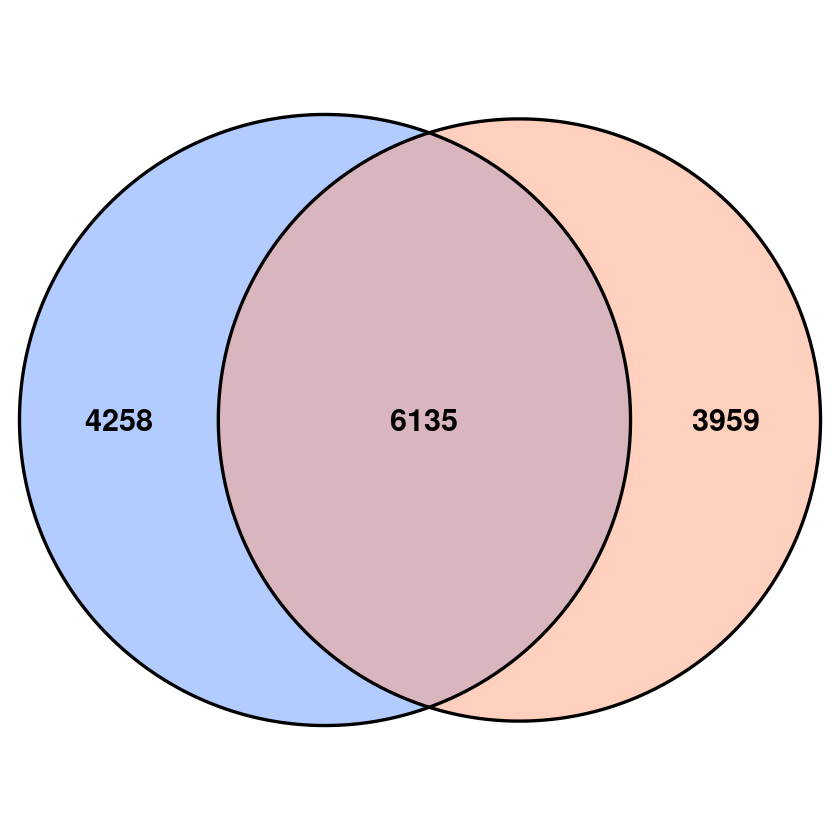

In [23]:
# area1, area2, n12
venn.plot <- draw.pairwise.venn(10393, 10094, 6135, 
                              fill = c("#6699FF", "#FFA17A"),
                              alpha = c(.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",3),
                              category = c("", ""), 
                              scaled = TRUE,
                              )
pdf("~/project-gandalm/isoform_twas/eqtl_new/figures/ct_bulk.pdf", width = 3, height = 3)
grid.draw(venn.plot)
dev.off()

In [22]:
3959/(4258+6135+3959)

[1] 0.2758501